## **SCORING - Acetylcholinesterase**
#### **Micha Birklbauer 2021-07-08**

In [1]:
import os
from shutil import copyfile
copyfile("../../../scripts/python/scoring.py", "scoring.py")

'scoring.py'

In [2]:
import pandas as pd
from scoring import *

#### **Load data:**

In [3]:
data_train = pd.read_csv("data_train.csv")
data_val = pd.read_csv("data_val.csv")
data_test = pd.read_csv("data_test.csv")
features = pd.read_csv("features.csv")

In [4]:
# data_train.info()

In [5]:
data_train

,INDEX,NAME,Hydrophobic_Interaction:PHE297A,Pi-Cation_Interaction:TRP86A,Water_Bridge:GLY120A,Pi-Stacking:TRP86A,Hydrophobic_Interaction:TYR341A,Halogen_Bond:THR75A,Halogen_Bond:TRP286A,Hydrogen_Bond:ASN87A,...,Water_Bridge:THR83A,Hydrogen_Bond:GLN291A,Halogen_Bond:GLY120A,Water_Bridge:THR75A,Pi-Cation_Interaction:TYR341A,Hydrogen_Bond:SER125A,Water_Bridge:ALA204A,Pi-Stacking:TYR124A,Hydrophobic_Interaction:GLU202A,LABEL
0,1,ZINC39710553|decoys_final2|sdf|80,1,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,inactive
1,2,ZINC39711540|decoys_final2|sdf|89,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,inactive
2,3,ZINC39710360|decoys_final2|sdf|76,1,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
3,4,CHEMBL374981|actives_final|sdf|138,0,0,0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,active
4,5,CHEMBL219264|actives_final|sdf|334,0,0,1,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,760,CHEMBL576005|actives_final|sdf|279,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,active
760,761,CHEMBL153865|actives_final|sdf|341,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,active
761,762,CHEMBL146674|actives_final|sdf|297,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
762,763,ZINC04195090|decoys_final2|sdf|324,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive


In [6]:
print("Training dataset shape & Nr. of actives:")
print(data_train.shape, len(data_train.loc[data_train["LABEL"] == "active"]))

Training dataset shape & Nr. of actives:
(764, 138) 427


In [7]:
print("Validation dataset shape & Nr. of actives:")
print(data_val.shape, len(data_val.loc[data_val["LABEL"] == "active"]))

Validation dataset shape & Nr. of actives:
(192, 138) 104


In [8]:
print("Test dataset shape & Nr. of actives:")
print(data_test.shape, len(data_test.loc[data_test["LABEL"] == "active"]))

Test dataset shape & Nr. of actives:
(239, 138) 133


In [9]:
features

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Water_Bridge:ASP74A,0.547036,1.337237,1.884273
1,2,Pi-Stacking:TRP286A,0.448127,0.822014,0.373887
2,3,Hydrogen_Bond:TYR124A,0.409753,0.323185,0.732938
3,4,Hydrophobic_Interaction:ASP74A,0.372518,0.117096,0.489614
4,5,Hydrophobic_Interaction:TYR124A,0.265096,0.203747,0.468843
...,...,...,...,...,...
130,131,Hydrophobic_Interaction:ARG296A,0.001091,0.007026,0.005935
131,132,Water_Bridge:GLY126A,0.000625,0.002342,0.002967
132,133,Hydrogen_Bond:TRP286A,0.000625,0.002342,0.002967
133,134,Water_Bridge:THR83A,0.000625,0.002342,0.002967


#### **Extract relevant features:**

In [10]:
features_filtered = get_relevant_features(features)
features_filtered

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Water_Bridge:ASP74A,0.547036,1.337237,1.884273
1,2,Pi-Stacking:TRP286A,0.448127,0.822014,0.373887
2,3,Hydrogen_Bond:TYR124A,0.409753,0.323185,0.732938
3,4,Hydrophobic_Interaction:ASP74A,0.372518,0.117096,0.489614
4,5,Hydrophobic_Interaction:TYR124A,0.265096,0.203747,0.468843
6,7,Hydrogen_Bond:ASP74A,0.238987,0.117096,0.356083
9,10,Pi-Stacking:TYR337A,0.166360,0.100703,0.267062
10,11,Hydrophobic_Interaction:LEU289A,0.159181,0.381733,0.222552
11,12,Pi-Stacking:TYR341A,0.157659,0.245902,0.403561
13,14,Hydrogen_Bond:TYR341A,0.146839,0.105386,0.252226


In [11]:
# some error checking -- should print nothing
for item in features_filtered["INTERACTION"].to_list():
    if item not in data_train.columns.to_list():
        print(item)

#### **Get positive features (e.g. features that have a positive impact on activeness) and negative features:**

In [12]:
positives, negatives = get_feature_impact(features_filtered)

In [13]:
positives

['Pi-Stacking:TRP286A',
 'Hydrophobic_Interaction:LEU289A',
 'Hydrogen_Bond:PHE295A',
 'Hydrogen_Bond:SER203A',
 'Hydrophobic_Interaction:PHE338A',
 'Pi-Stacking:TRP86A',
 'Hydrogen_Bond:HIS447A',
 'Hydrogen_Bond:GLY121A']

In [14]:
negatives

['Water_Bridge:ASP74A',
 'Hydrogen_Bond:TYR124A',
 'Hydrophobic_Interaction:ASP74A',
 'Hydrophobic_Interaction:TYR124A',
 'Hydrogen_Bond:ASP74A',
 'Pi-Stacking:TYR337A',
 'Pi-Stacking:TYR341A',
 'Hydrogen_Bond:TYR341A',
 'Hydrophobic_Interaction:PHE297A',
 'Hydrophobic_Interaction:TYR72A',
 'Hydrophobic_Interaction:TRP86A',
 'Hydrophobic_Interaction:TRP286A']

#### **Score Compounds with different strategies & save results:**

In [15]:
# make data copies
train_result_strat1 = data_train.copy()
train_result_strat2 = data_train.copy()
train_result_strat3 = data_train.copy()
train_result_strat4 = data_train.copy()
# calculate scores
train_result_strat1["SCORE"] = train_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
train_result_strat2["SCORE"] = train_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
train_result_strat3["SCORE"] = train_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
train_result_strat4["SCORE"] = train_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
train_result_strat1_sorted = train_result_strat1.sort_values(by = "SCORE", ascending = False)
train_result_strat2_sorted = train_result_strat2.sort_values(by = "SCORE", ascending = False)
train_result_strat3_sorted = train_result_strat3.sort_values(by = "SCORE", ascending = False)
train_result_strat4_sorted = train_result_strat4.sort_values(by = "SCORE", ascending = False)
# save data
# train_result_strat1_sorted.to_csv("train_scores1.csv")
# train_result_strat2_sorted.to_csv("train_scores2.csv")
# train_result_strat3_sorted.to_csv("train_scores3.csv")
# train_result_strat4_sorted.to_csv("train_scores4.csv")

#### **Find best cutoff value and print metrics:**

*cutoff/accuracy for different strategies:*

In [16]:
print(
"Strategy 1: ",
get_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list()),
"\nStrategy 2: ",
get_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list()),
"\nStrategy 3: ",
get_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list()),
"\nStrategy 4: ",
get_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list())
)

Strategy 1:  [3, 0.643979057591623] 
Strategy 2:  [4, 0.6413612565445026] 
Strategy 3:  [0, 0.6413612565445026] 
Strategy 4:  [0, 0.6583769633507853]


*accuracy for best cutoff:*

In [17]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 3, "accuracy"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 4, "accuracy"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), 0, "accuracy"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), 0, "accuracy")
)

Strategy 1:  0.643979057591623 
Strategy 2:  0.6413612565445026 
Strategy 3:  0.6413612565445026 
Strategy 4:  0.6583769633507853


*false positive rate for best cutoff:*

In [18]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 3, "fpr"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 4, "fpr"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), 0, "fpr"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), 0, "fpr")
)

Strategy 1:  0.3560830860534125 
Strategy 2:  0.26409495548961426 
Strategy 3:  0.09198813056379822 
Strategy 4:  0.10979228486646884


#### **Calculate validation and test results:**

In [19]:
# make data copies
val_result_strat1 = data_val.copy()
val_result_strat2 = data_val.copy()
val_result_strat3 = data_val.copy()
val_result_strat4 = data_val.copy()
# calculate scores
val_result_strat1["SCORE"] = val_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
val_result_strat2["SCORE"] = val_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
val_result_strat3["SCORE"] = val_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
val_result_strat4["SCORE"] = val_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
val_result_strat1_sorted = val_result_strat1.sort_values(by = "SCORE", ascending = False)
val_result_strat2_sorted = val_result_strat2.sort_values(by = "SCORE", ascending = False)
val_result_strat3_sorted = val_result_strat3.sort_values(by = "SCORE", ascending = False)
val_result_strat4_sorted = val_result_strat4.sort_values(by = "SCORE", ascending = False)

In [20]:
# make data copies
test_result_strat1 = data_test.copy()
test_result_strat2 = data_test.copy()
test_result_strat3 = data_test.copy()
test_result_strat4 = data_test.copy()
# calculate scores
test_result_strat1["SCORE"] = test_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
test_result_strat2["SCORE"] = test_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
test_result_strat3["SCORE"] = test_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
test_result_strat4["SCORE"] = test_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
test_result_strat1_sorted = test_result_strat1.sort_values(by = "SCORE", ascending = False)
test_result_strat2_sorted = test_result_strat2.sort_values(by = "SCORE", ascending = False)
test_result_strat3_sorted = test_result_strat3.sort_values(by = "SCORE", ascending = False)
test_result_strat4_sorted = test_result_strat4.sort_values(by = "SCORE", ascending = False)

#### **Quality metrics for training and validation data:**

*training data:*

In [21]:
print(
"Strategy 1: ",
get_metrics(train_result_strat1, 3, pretty_print = True),
"\nStrategy 2: ",
get_metrics(train_result_strat2, 4, pretty_print = True),
"\nStrategy 3: ",
get_metrics(train_result_strat3, 0, pretty_print = True),
"\nStrategy 4: ",
get_metrics(train_result_strat4, 0, pretty_print = True)
)

Strategy 1:  {'ACC': 0.643979057591623, 'FPR': 0.3560830860534125, 'AUC': 0.6515194685161119, 'Ya': 0.6962025316455697, 'EF': 1.245664482850621, 'REF': 69.62025316455696} 
Strategy 2:  {'ACC': 0.6413612565445026, 'FPR': 0.26409495548961426, 'AUC': 0.6653625112057763, 'Ya': 0.7311178247734139, 'EF': 1.3081358738334619, 'REF': 73.1117824773414} 
Strategy 3:  {'ACC': 0.6413612565445026, 'FPR': 0.09198813056379822, 'AUC': 0.7945190724049507, 'Ya': 0.8558139534883721, 'EF': 1.5312455748597569, 'REF': 85.5813953488372} 
Strategy 4:  {'ACC': 0.6583769633507853, 'FPR': 0.10979228486646884, 'AUC': 0.7945190724049507, 'Ya': 0.8458333333333333, 'EF': 1.5133879781420763, 'REF': 84.58333333333333}


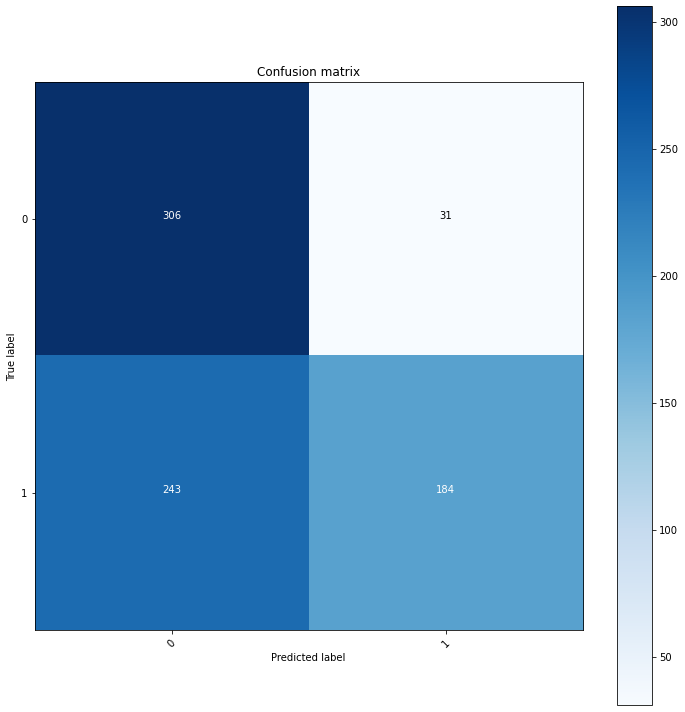

In [22]:
plot_confusion_matrix(get_metrics(train_result_strat3, 0)["CM"], classes = [0, 1], filename = "results/CM_train_strat3.png");

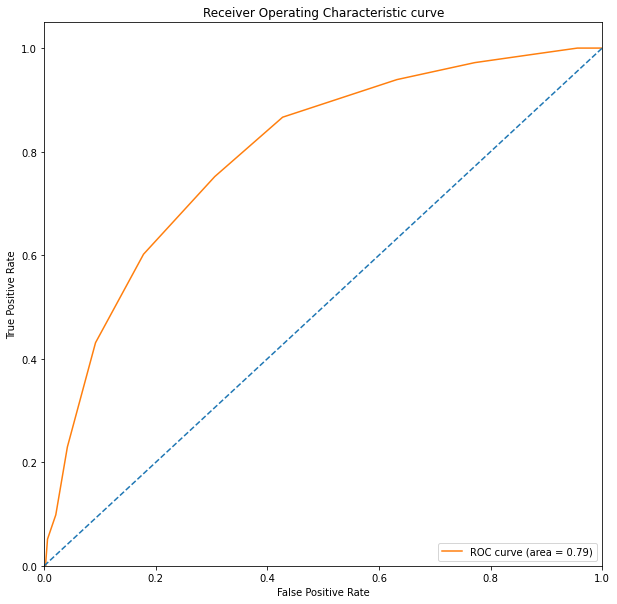

In [23]:
roc = get_metrics(train_result_strat3, 0)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_train_strat3.png");

*validation data:*

In [24]:
print(
"Strategy 1: ",
get_metrics(val_result_strat1, 3, pretty_print = True),
"\nStrategy 2: ",
get_metrics(val_result_strat2, 4, pretty_print = True),
"\nStrategy 3: ",
get_metrics(val_result_strat3, 0, pretty_print = True),
"\nStrategy 4: ",
get_metrics(val_result_strat4, 0, pretty_print = True)
)

Strategy 1:  {'ACC': 0.6510416666666666, 'FPR': 0.4090909090909091, 'AUC': 0.683402534965035, 'Ya': 0.6697247706422018, 'EF': 1.2364149611856035, 'REF': 70.1923076923077} 
Strategy 2:  {'ACC': 0.6041666666666666, 'FPR': 0.3977272727272727, 'AUC': 0.6863527097902098, 'Ya': 0.6428571428571429, 'EF': 1.186813186813187, 'REF': 64.28571428571429} 
Strategy 3:  {'ACC': 0.6510416666666666, 'FPR': 0.14772727272727273, 'AUC': 0.7742569930069931, 'Ya': 0.7936507936507936, 'EF': 1.4652014652014653, 'REF': 79.36507936507937} 
Strategy 4:  {'ACC': 0.6979166666666666, 'FPR': 0.1590909090909091, 'AUC': 0.7618006993006993, 'Ya': 0.8108108108108109, 'EF': 1.496881496881497, 'REF': 81.08108108108108}


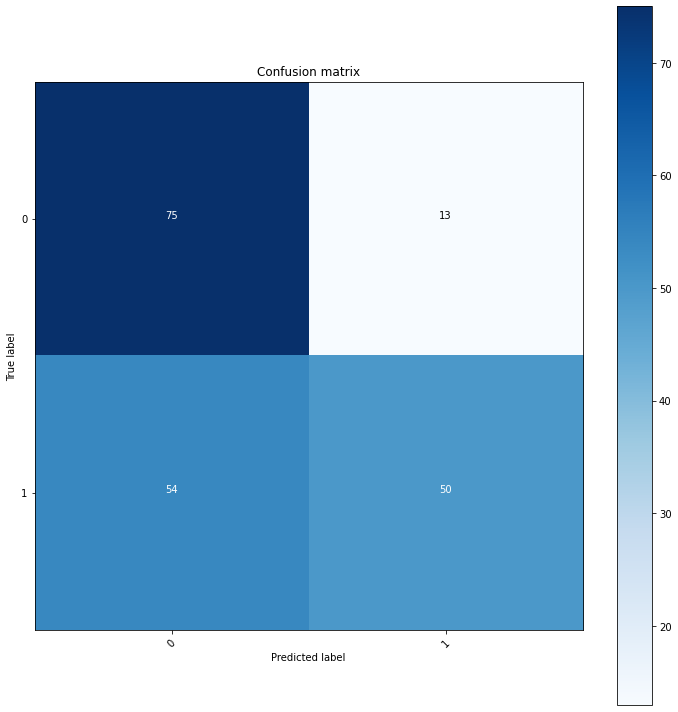

In [25]:
plot_confusion_matrix(get_metrics(val_result_strat3, 0)["CM"], classes = [0, 1], filename = "results/CM_val_strat3.png");

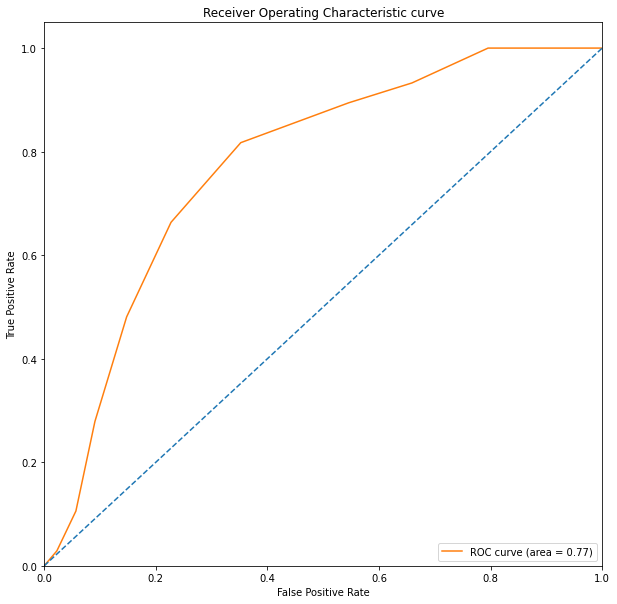

In [26]:
roc = get_metrics(val_result_strat3, 0)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_val_strat3.png");

*test data:*

In [27]:
print(
"Strategy 1: ",
get_metrics(test_result_strat1, 3, pretty_print = True),
"\nStrategy 2: ",
get_metrics(test_result_strat2, 4, pretty_print = True),
"\nStrategy 3: ",
get_metrics(test_result_strat3, 0, pretty_print = True),
"\nStrategy 4: ",
get_metrics(test_result_strat4, 0, pretty_print = True)
)

Strategy 1:  {'ACC': 0.6150627615062761, 'FPR': 0.41509433962264153, 'AUC': 0.6099446730032629, 'Ya': 0.6589147286821705, 'EF': 1.18406481319578, 'REF': 65.89147286821705} 
Strategy 2:  {'ACC': 0.6150627615062761, 'FPR': 0.32075471698113206, 'AUC': 0.6398425308554404, 'Ya': 0.6880733944954128, 'EF': 1.2364627164240878, 'REF': 68.80733944954129} 
Strategy 3:  {'ACC': 0.6359832635983264, 'FPR': 0.1320754716981132, 'AUC': 0.7520215633423181, 'Ya': 0.8108108108108109, 'EF': 1.4570209307051414, 'REF': 81.08108108108108} 
Strategy 4:  {'ACC': 0.6485355648535565, 'FPR': 0.1320754716981132, 'AUC': 0.7505319903532416, 'Ya': 0.8181818181818182, 'EF': 1.4702665755297337, 'REF': 81.81818181818181}


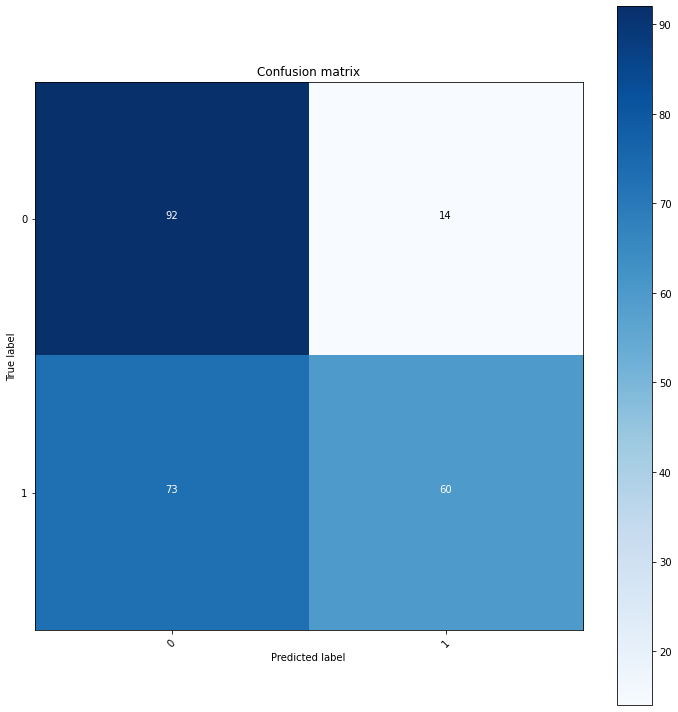

In [28]:
plot_confusion_matrix(get_metrics(test_result_strat3, 0)["CM"], classes = [0, 1], filename = "results/CM_test_strat3.png");

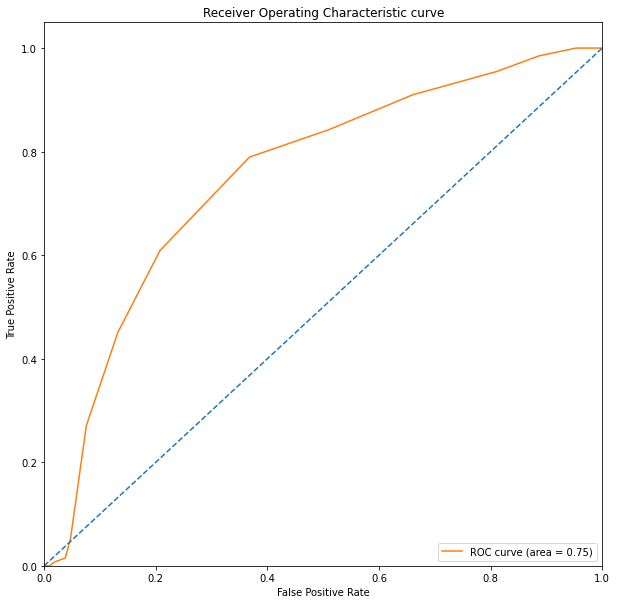

In [29]:
roc = get_metrics(test_result_strat3, 0)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_test_strat3.png");

#### **Clean up:**

In [30]:
os.remove("scoring.py")